In [ ]:
import pathlib
import pandas as pd
import dask.dataframe as dd
from config import load_config
import visualizations
import numpy as np
import utils
config = load_config()

origin_files = pathlib.Path(config['datapath_30G'])
processed_files = pathlib.Path("processed_data") / origin_files.name
processed_time_files = pathlib.Path("processed_data_1") / origin_files.name

In [2]:
df1 = dd.read_parquet(origin_files)

df = dd.concat([df1], axis=1)

df["income_bin"] = utils.create_bins(df, "income", 5)


df["age_bin"] = utils.create_bins(df, "age", 5)





discrete_col = ["age_bin", "income_bin", "gender", "country"]



In [3]:
df.columns


Index(['id', 'last_login', 'user_name', 'fullname', 'email', 'age', 'income',
       'gender', 'country', 'address', 'purchase_history', 'is_active',
       'registration_date', 'phone_number', 'login_history', 'income_bin',
       'age_bin'],
      dtype='object')

In [8]:
a=df.head(5)

In [18]:
a["login_history"][4]

'{"avg_session_duration":51,"devices":["desktop","mobile","tablet"],"first_login":"2024-12-10","locations":["travel","work"],"login_count":46,"timestamps":["2024-12-10 12:03:00","2024-12-10 12:11:00","2024-12-10 12:35:00","2024-12-10 12:38:00","2024-12-10 12:44:00","2024-12-10 12:51:00","2024-12-10 12:53:00","2024-12-10 13:29:00","2024-12-10 13:56:00","2024-12-10 14:08:00","2024-12-10 14:17:00","2024-12-10 15:25:00","2024-12-10 15:35:00","2024-12-10 16:21:00","2024-12-10 16:44:00","2024-12-10 16:53:00","2024-12-10 17:12:00","2024-12-10 17:34:00","2024-12-10 17:49:00"]}'

In [9]:
# 利用Pearson系数计算相关性
for i in range(len(numeric_col)):
    for j in range(i+1, len(numeric_col)):
        corr = df[numeric_col[i]].corr(df[numeric_col[j]]).compute()
        print(f"Pearson correlation {numeric_col[i]} and {numeric_col[j]}: {corr:.8f}")

Pearson correlation age and income: -0.00017969
Pearson correlation age and average_price: 0.00001854
Pearson correlation age and total_price: -0.00012619
Pearson correlation age and credit_score: 0.99992588
Pearson correlation age and registration_date_num: 0.00017014
Pearson correlation age and timestamp_num: 0.00017065
Pearson correlation income and average_price: 0.00188650
Pearson correlation income and total_price: 0.00038083
Pearson correlation income and credit_score: -0.00016226
Pearson correlation income and registration_date_num: -0.00181032
Pearson correlation income and timestamp_num: -0.00181052
Pearson correlation average_price and total_price: 0.68641170
Pearson correlation average_price and credit_score: 0.00000959
Pearson correlation average_price and registration_date_num: 0.00018122
Pearson correlation average_price and timestamp_num: 0.00018105
Pearson correlation total_price and credit_score: -0.00012697
Pearson correlation total_price and registration_date_num: 0

In [4]:
# 利用卡方计算相关性
for i in range(len(discrete_col)):
    for j in range(i+1, len(discrete_col)):
        chi2, p, dof, expected = utils.x2_test(df, discrete_col[i], discrete_col[j])
        print(f"chi2 and p of {discrete_col[i]} and {discrete_col[j]}: {chi2}, {p}")

chi2 and p of age_bin and income_bin: 15.272209696693057, 0.5047990825689346
chi2 and p of age_bin and gender: 26.264070271382835, 0.009847068687575018
chi2 and p of age_bin and country: 19.08669336967966, 0.990683693771405
chi2 and p of income_bin and gender: 12.066488560072084, 0.4403547422146706
chi2 and p of income_bin and country: 26.630084767570803, 0.8723099166001175
chi2 and p of gender and country: 39.97616511747976, 0.051500532981839445


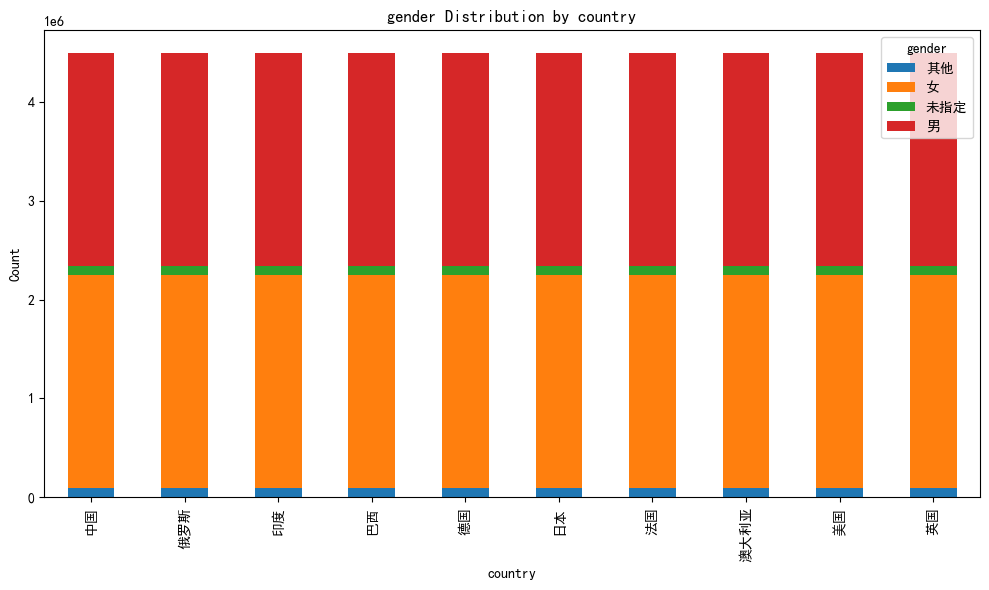

In [5]:
visualizations.draw_stacked_barplot(df, category_col='country', subcategory_col='gender')


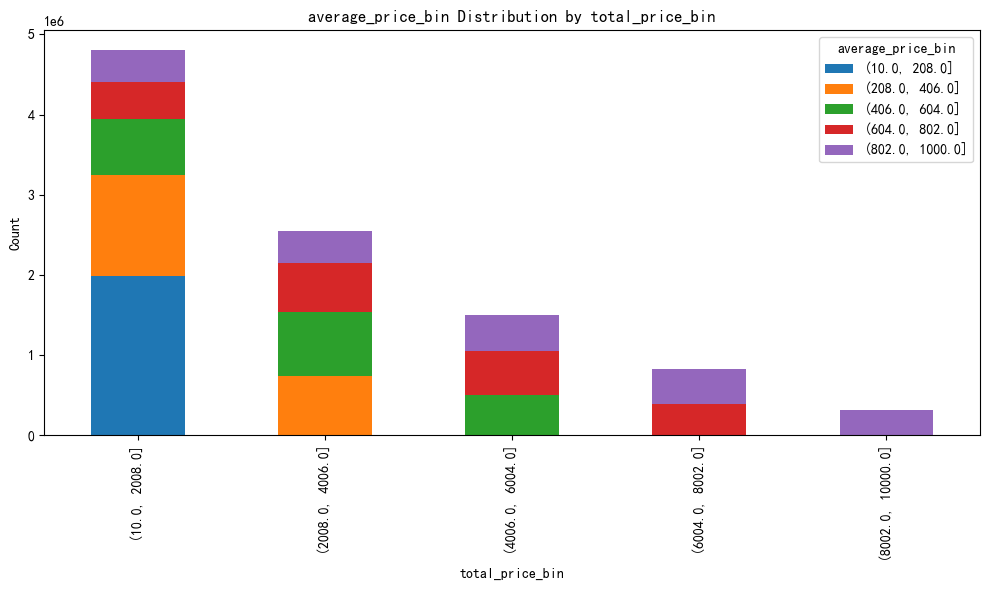

In [11]:
visualizations.draw_stacked_barplot(df, category_col='total_price_bin', subcategory_col='average_price_bin')


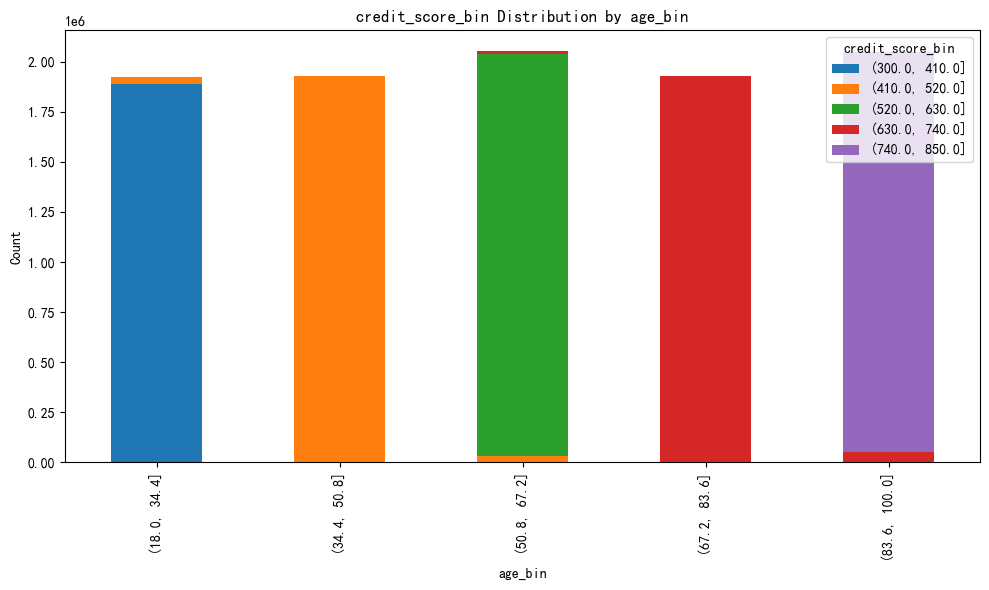

In [3]:
visualizations.draw_stacked_barplot(df, category_col='age_bin', subcategory_col='credit_score_bin')
